In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

### Cargamos los datos

In [2]:
data = pd.read_csv("./diamonds.csv", sep=',', decimal='.')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
#Borramos la primera columna
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Análisis exploratorio

In [4]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Así a simple vista observo que en las columnas x,y,z (longitud, anchura y profundidad) hay valores a cero. Esto no debería ocrurrir, voy a analizarlo en más profundidad.

In [5]:
data[(data['x'] == 0) | (data['y'] == 0) | (data['z'] == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [6]:
len(data[(data['x'] == 0) | (data['y'] == 0) | (data['z'] == 0)])

20

In [7]:
data.shape

(53940, 10)

Hay 20 filas de 53940 que tienen valores 0 en alguna de estas columnas o en todas ellas.

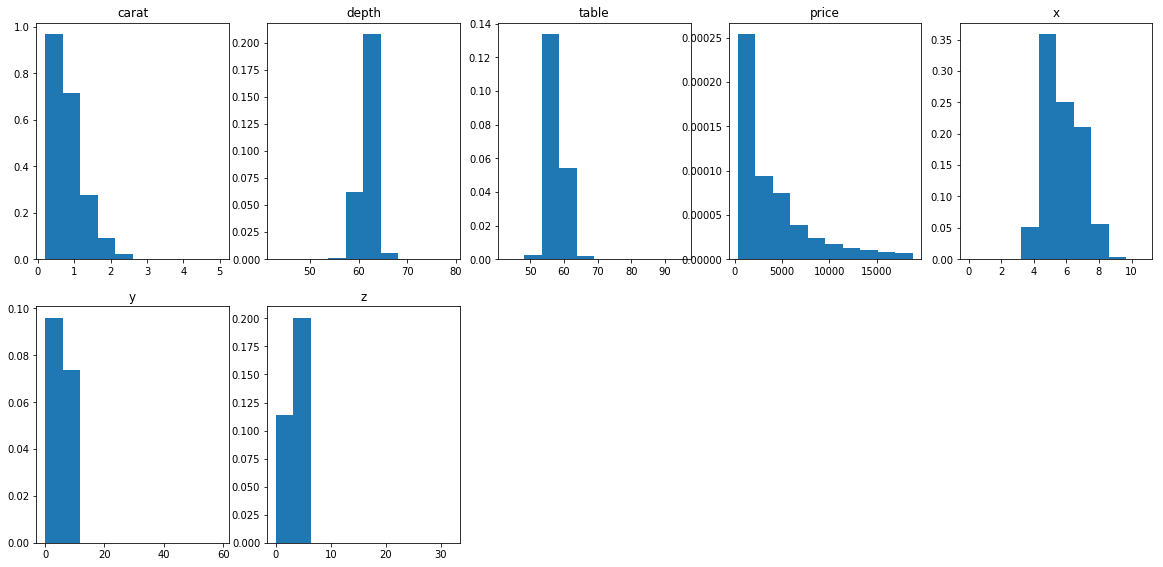

In [8]:
# Pintamos histogramas para ver cómo se distribuyen los valores
plt.figure(figsize=(20,20))

columns_to_drop=['cut','color','clarity']
# your code here
for i,feature in enumerate(data.columns.drop(columns_to_drop)):
    plt.subplot(4,5,i+1)   
    plt.hist(data[feature],normed=1)   
    plt.title(feature)

plt.show()

Voy a hacer una representación (scatter_plot) de todas las variables frente al resto, para tener una idea de cómo se relacionan las variables del problema.

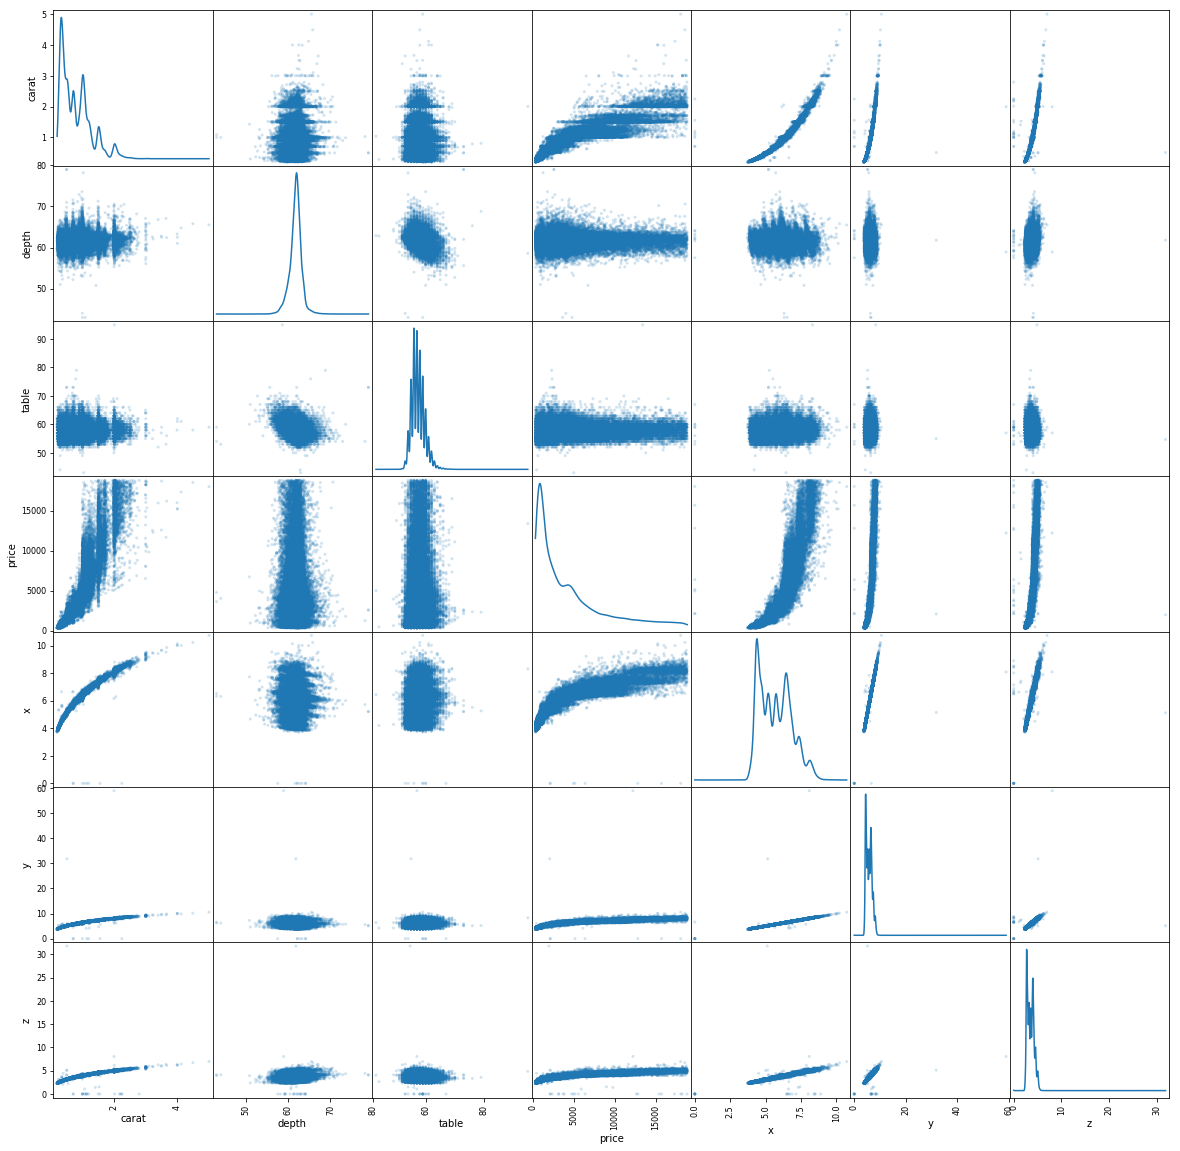

In [9]:
#En la diagonal le indicamos que represente la función de densidad de probabilidad, con el parámetro diagonal = kde
pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

### Preprocesamiento

Voy a eliminar los datos con valores a cero en x,y,z, ya que representan sólo un 0,03% de los datos

In [10]:
data = data.replace(0, np.NaN)
data.dropna(inplace=True)
data.shape

(53920, 10)

In [11]:
data.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

Vemos que hay tres variables categóricas y además según el enunciado de la práctica sus valores siguen un orden, desde peor a mejor calidad del corte, peor a mejor color y mejor a peor medida de la claridad del diamante, por lo que las codificaré asignándole valores numéricos que conserven este orden.

In [13]:
cleanup_nums = {"cut":     {"Fair": 1, "Good": 2, "Very Good": 3,"Premium":4, "Ideal":5},
                "color":   {"J":1,"I":2,"H":3,"G":4,"F":5,"E":6,"D":7},
                "clarity": {"I1":1, "SI2":2, "SI1":3,"VS2":4,"VS1":5,"VVS2":6,"VVS1":7,"IF":8}}
data.replace(cleanup_nums, inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


## Selección del modelo:
### 1. Regresión lineal

**Análisis individual precio/peso:** Primera aproximación del modelo

En principio podría pensar que el peso(carat) está altamente relacionado con el precio del diamante. Voy a estudiar su correlación

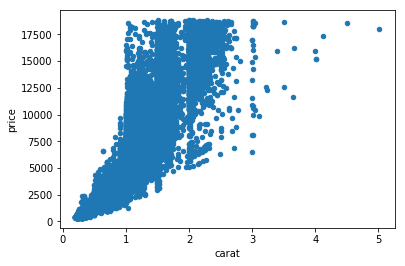

In [14]:
data.plot.scatter(x='carat',y='price')

Por la distribución de los puntos lugar de una relación linear es cuadrática, por lo que voy a transformar los datos con logaritmos.

In [15]:
#Observo que los valores de price y carat están desplazados hacia la izda. Voy a hacer una transformación a logaritmos
features_to_transform = ['price','carat']

for feature in features_to_transform:
    data[feature] = data[feature].apply(lambda x: np.log10(x))

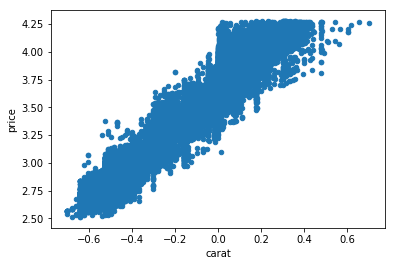

In [16]:
data.plot.scatter(x='carat',y='price')

Text(0.5,1,'carat')

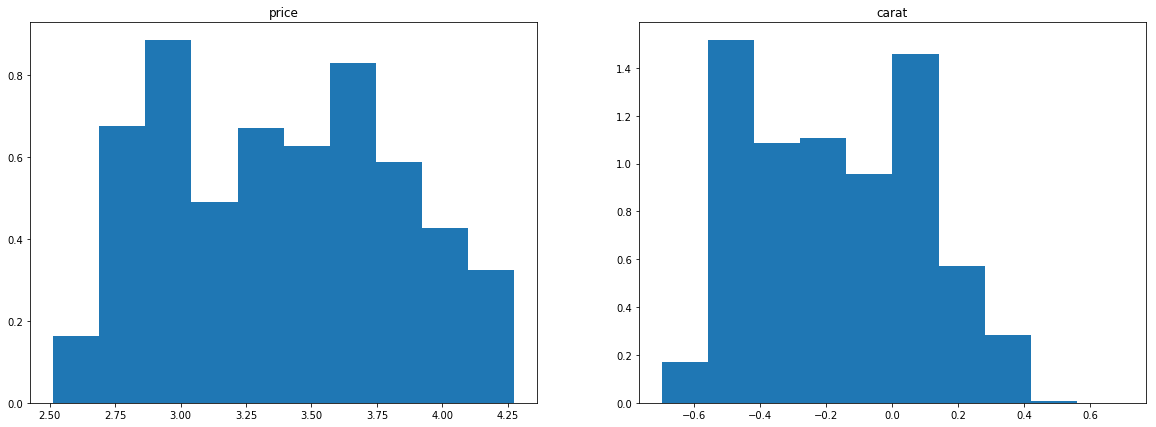

In [17]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1) 
plt.hist(data['price'],normed=1)
plt.title('price')
plt.subplot(1,2,2) 
plt.hist(data['carat'],normed=1)
plt.title('carat')


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data['carat'].as_matrix().reshape(-1, 1)
y = data['price'].as_matrix()

# PASO 1: División de las muestras en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression()
lr.fit(Xs_train, y_train)

print("Train: ",lr.score(Xs_train,y_train))
print("Test: ",lr.score(Xs_test,y_test))

Train:  0.9330216818851119
Test:  0.9329337999381145


**Todas las variables:** Segunda aproximación del modelo

In [20]:
#Preparamos los datos
features = data.columns.drop(['price'])

X = data[features].as_matrix()
y = data['price'].as_matrix()

# PASO 1: División de las muestras en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(Xs_train, y_train)

print("Train: ",lr.score(Xs_train,y_train))
print("Test: ",lr.score(Xs_test,y_test))

Train:  0.9791973955010983
Test:  0.9794557961539385


Obentengo buenas prestaciones con un modelo de regresión lineal. Voy a estudiar los coeficientes de las variables

In [21]:
feature_names = data.columns.drop(['price'])
w = lr.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)


carat 0.45952719131192765
cut 0.014588961399885806
color 0.05798387946182211
clarity 0.0876549319398449
depth -0.0014528855563270475
table -0.000432697997093798
x 0.013346664907265727
y 0.004080983670220291
z -3.415497842447689e-05


A la vista de los coeficientes, ¿y si empleamos en el modelo sólo carat, cut, color y clarity?

In [22]:
features = data.columns.drop(['price','depth','table','x','y','z'])

X = data[features].as_matrix()
y = data['price'].as_matrix()

# PASO 1: División de las muestras en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(Xs_train, y_train)

print("Train: ",lr.score(Xs_train,y_train))
print("Test: ",lr.score(Xs_test,y_test))

Train:  0.9791546010401281
Test:  0.9794220351414048


Obtengo unos datos muy parecidos con un modelo más sencillo, que tiene menos variables, así que a priori me quedaría con este modelo. Voy a hacer selección de características aplicando métodos de filtrado, a ver si coinciden los resultados.

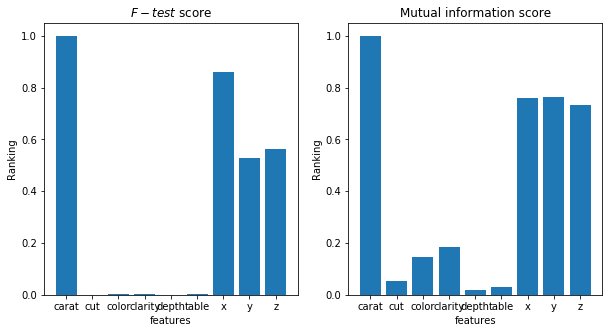

In [23]:
from sklearn.feature_selection import f_regression, mutual_info_regression

featureNames = data.columns.drop(['price'])
X = data[featureNames].as_matrix()
y = data['price'].as_matrix()

# do calculations
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),featureNames)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F-test$ score')


plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi,  align="center")
plt.xticks(range(X.shape[1]),featureNames)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

Pues según esto, con 'carat', 'color, 'clarity', 'x', 'y' y 'z' deberíamos tener un buen modelo.

In [24]:
features = data.columns.drop(['price','depth','table','cut'])

X = data[features].as_matrix()
y = data['price'].as_matrix()

# PASO 1: División de las muestras en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(Xs_train, y_train)

print("Train: ",lr.score(Xs_train,y_train))
print("Test: ",lr.score(Xs_test,y_test))

Train:  0.9781371229139932
Test:  0.9784196673957296


Frente a este modelo prefiero quedarme con el que propuse en un principio por intución, con las variables carat, cut, color y clarity, ya que son 4 variables y las prestaciones son similares. A ver qué nos sale con Lasso.

In [25]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

#Volvemos a coger todas las caracterísitcas
features = data.columns.drop(['price'])

X = data[features].as_matrix()
y = data['price'].as_matrix()

# PASO 1: División de las muestras en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

alphas = np.logspace(-3, 3, 20)
grid = GridSearchCV(estimator=Lasso(random_state=0),
                    param_grid=dict(alpha=alphas), cv=10, scoring='r2')

grid.fit(Xs_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.979
best parameters: {'alpha': 0.001}


In [26]:
#model
alpha = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha).fit(Xs_train,y_train)
w = lasso.coef_

for f,wi in zip(features,w):
    print(f,wi)

carat 0.4486246146028774
cut 0.013884309197256814
color 0.05654606563967761
clarity 0.0859540945131613
depth -0.00010079532359755248
table -0.0
x 0.02083748409084041
y 0.005212435517393295
z 0.0


Me voy a quedar con las variables cuyos coeficientes no son cero: carat, cut, color, clarity, depth, x, y

In [27]:
features = data.columns.drop(['price','table','z'])

X = data[features].as_matrix()
y = data['price'].as_matrix()

# PASO 1: División de las muestras en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(Xs_train, y_train)

print("Train: ",lr.score(Xs_train,y_train))
print("Test: ",lr.score(Xs_test,y_test))

Train:  0.9791967880247286
Test:  0.979456639026473


Mejora muy poco el modelo que elegí por intiución personal, que tenía estas prestaciones:
```
Train:  0.9791546010401281
Test:  0.9794220351414048
```
Esta forma de selección de características es más empírica, pero el modelo que sale es más complejo. Me quedaría con mi modelo.

### 2. Árboles de decisión

In [30]:
features = data.columns.drop(['price'])

X = data[features].as_matrix()
y = data['price'].as_matrix()

# PASO 1: División de las muestras en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

R2-CV: 0.987
best mean cross-validation score: 0.987
best parameters: {'max_depth': 13}


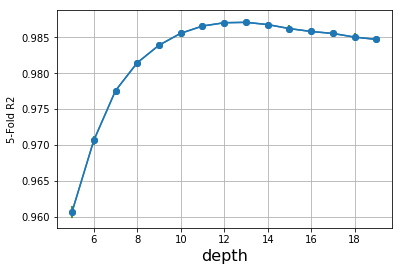

In [32]:
from sklearn.tree import DecisionTreeRegressor

depth_vector = range(5,20)
param_grid = {'max_depth': depth_vector }
grid = GridSearchCV(DecisionTreeRegressor(), scoring= 'r2', param_grid=param_grid, cv = 5)
grid.fit(Xs_train, y_train)
print("R2-CV: {:.3f}".format(grid.best_score_))
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#scores = np.array(grid.cv_results_['mean_test_score'])
scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.errorbar(depth_vector,scores,yerr=std_scores, fmt='o-',ecolor='g')
plt.plot(depth_vector,scores,'-o')
plt.xlabel('depth',fontsize=16)
plt.ylabel('5-Fold R2')
plt.grid()
plt.show()

In [33]:
maxDepthOpt = grid.best_params_['max_depth']
decisionTree = DecisionTreeRegressor(max_depth=maxDepthOpt)
decisionTree.fit(Xs_train, y_train)

print("Train: ",decisionTree.score(Xs_train,y_train))
print("Test: ",decisionTree.score(Xs_test,y_test))

Train:  0.9946977980530546
Test:  0.9883247041412796


Hemos mejorado ligeramente con respecto a regresión lineal... sin embargo y observando el gráfico, se me ocurre coger 10 como parámetro óptimo para la profundidad, ya que a partir de este punto crecen poco las prestaciones y además es un modelo más sencillo.

In [34]:
decisionTree = DecisionTreeRegressor(max_depth=10)
decisionTree.fit(Xs_train, y_train)

print("Train: ",decisionTree.score(Xs_train,y_train))
print("Test: ",decisionTree.score(Xs_test,y_test))

Train:  0.9889996783654689
Test:  0.9860110093728915


Aunque es poca la variación, me gustan más estos resultados. Voy a hacer una selección de características basándonos en este modelo

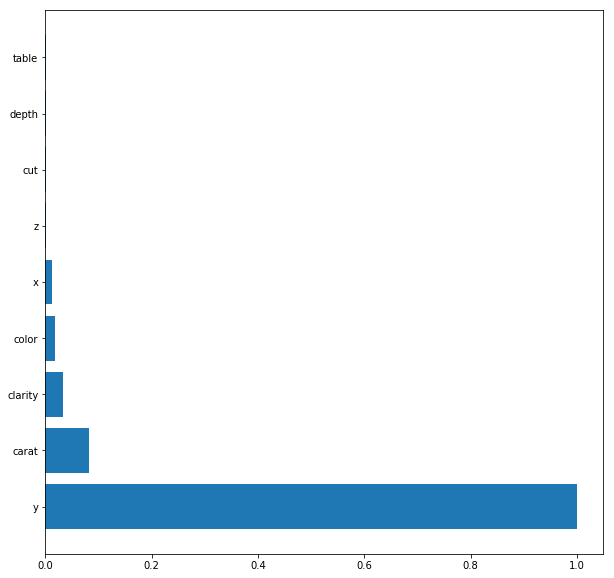

In [35]:
importances = decisionTree.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

Sorprendentemente la característica y es la más relevante. Voy a entrenar un árbol de decisión con las características más relevantes.

In [36]:
features_dt = data.columns.drop(['price','table','depth','cut','z'])

X = data[features_dt].as_matrix()
y = data['price'].as_matrix()

# PASO 1: División de las muestras en train y test
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size = 0.25, random_state=0)

scaler = StandardScaler().fit(X_train_dt)
Xs_train_dt = scaler.transform(X_train_dt)
Xs_test_dt  = scaler.transform(X_test_dt)

decisionTree2 = DecisionTreeRegressor(max_depth=10)
decisionTree2.fit(Xs_train_dt, y_train_dt)

print("Train: ",decisionTree2.score(Xs_train_dt,y_train_dt))
print("Test: ",decisionTree2.score(Xs_test_dt,y_test_dt))

Train:  0.9887583305945408
Test:  0.9860842322380409


De todos los modelos este con menos caracterísitcas es el que más me convence.

### 3. Random Forest

best mean cross-validation score: 0.992
best parameters: {'max_depth': 19}


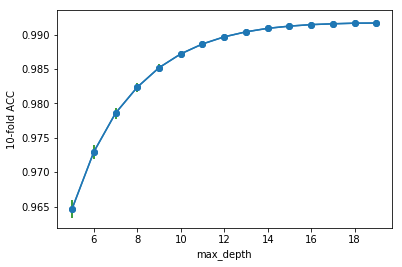

In [37]:
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(5,20)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'),
                    param_grid=tuned_parameters,
                    cv=10,
                    n_jobs=3) 
grid.fit(Xs_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
std_scores = grid.cv_results_['std_test_score']
plt.errorbar(maxDepth,scores,yerr=std_scores, fmt='o-',ecolor='g')
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [38]:
maxDepthOpt = grid.best_params_['max_depth']
rf = RandomForestRegressor(max_depth=maxDepthOpt,random_state=0, n_estimators=200, max_features='sqrt')
rf.fit(Xs_train, y_train)

print("Train: ",rf.score(Xs_train,y_train))
print("Test: ",rf.score(Xs_test,y_test))

Train:  0.9983541225024546
Test:  0.9921843310137775


Son buenas prestaciones, voy a probar con un valor más bajo de profundidad: 

In [39]:
rf = RandomForestRegressor(max_depth=15,random_state=0, n_estimators=200, max_features='sqrt')
rf.fit(Xs_train, y_train)

print("Train: ",rf.score(Xs_train,y_train))
print("Test: ",rf.score(Xs_test,y_test))

Train:  0.9963562337485169
Test:  0.9917591491952915


In [40]:
rf = RandomForestRegressor(max_depth=10,random_state=0, n_estimators=200, max_features='sqrt')
rf.fit(Xs_train, y_train)

print("Train: ",rf.score(Xs_train,y_train))
print("Test: ",rf.score(Xs_test,y_test))

Train:  0.9891770549611332
Test:  0.9876123003674279


Me quedaría con el modelo de Random Forest para una profundidad de 15, es más sencillo y las prestaciones en test no bajan demasiado.

### 4. Boosted Trees

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

n_iterations = [25,50,75,100,125,150,175,200,300]
learning_rate = [0.5, 0.1, 0.05, 0.1]
# mantenemos max_depth estático: max_depth=2

param_grid = {'n_estimators': n_iterations,'learning_rate':learning_rate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=2), param_grid=param_grid, cv = 5, n_jobs=2)
grid.fit(Xs_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.991
best parameters: {'learning_rate': 0.5, 'n_estimators': 300}


In [42]:
learningRateOpt = grid.best_params_['learning_rate']
nEstimatorsOpt = grid.best_params_['n_estimators']
gbr = GradientBoostingRegressor(learning_rate=learningRateOpt,random_state=0, n_estimators=nEstimatorsOpt, max_depth=2)
gbr.fit(Xs_train, y_train)

print("Train: ",gbr.score(Xs_train,y_train))
print("Test: ",gbr.score(Xs_test,y_test))

Train:  0.9920220989818609
Test:  0.9915223432227663


Mejoramos muy poquito las prestaciones, quizá está más ajustada la diferencia entre train y test, lo que me puede llevar a pensar que hay menos sobreajuste.